# ĐÁNH GIÁ MODEL

1. Yêu cầu chung: Đánh giá model thông qua các độ đo như độ chính xác (accuracy) và confusion matrix

2. Yêu cầu cụ thể:
  - Input:
      - Tập tin chứa ground-truth (đáp án). Tức là với mỗi ảnh, CategoryID đã biết lúc annotate ở bước chuẩn bị dữ liệu.
      - Tập tin chứa kết quả prediction từ model (kết quả của bước huấn luyện - Training)
  - Output:
      - Confusion matrix A. Xem hướng dẫn: https://www.v7labs.com/blog/confusion-matrix-guide. Aij là số ảnh của CategoryID=i - được dự đoán là CategoryID=j. Aii là số mẫu được dự đoán đúng của CategoryID=i.
      - Accuracy = số lượng ảnh dự đoán đúng chia tổng số ảnh được dự đoán

3. Test thử
  - Lấy ra tập tin Test của Split1: MotocycleDataset-Splits-1-Test.csv. Đây là tập tin chứa ground-truth
  - Từ tập tin này, tạo ra tập tin  MotocycleDataset-Splits-1-Test-Pred.csv đóng vai trò như tập tin chứa kết quả prediction từ model. Chúng ta chưa có model để test, do đó, hãy tạo ngẫu nhiên các kết quả prediction (=CategoryID) để gán cho mỗi ảnh trong tập MotocycleDataset-Splits-1-Test.csv

4. Test thiệt
  - Nếu có file model thì apply model để cho ra kết quả prediction

5. Submission

  - Ghi kết quả ra tập tin theo chế độ Append: https://drive.google.com/file/d/1qjGycdcIqsoag_yaVqY8UAUNmpFUkVFe/view?usp=sharing
  - Quy ước:
    - Date: ví dụ 2024-06-11 10:32:19 (dùng hàm formatted_date = now.strftime("%Y-%m-%d %H:%M:%S"))
    - GroupID: các MSSV của thành viên trong nhóm cách nhau bằng dấu gạch ngang -, ví dụ 21522446-21522243
    - SplitID: giá trị từ 1 đến 5
    - Accuracy: giá trị theo quy ước dấu . phân cách phần thập phân, ví dụ 90.2345 - lấy đến 4 số thập phân
    - Desc: mô tả phương pháp, ví dụ Random. Mỗi nhóm có thể có rất nhiều trials, do đó cần phải mô tả tóm tắt về các trial để còn nhận diện
  


In [ ]:
import os
import csv
from pathlib import Path

# Đường dẫn tới thư mục chứa dữ liệu ảnh
dataset_path = Path("/content/drive/MyDrive/Public")

# Định nghĩa các nhãn và ánh xạ
categories = {
    'Others': 0,
    'Honda': 1,
    'Suzuki': 2,
    'Yamaha': 3,
    'VinFast': 4
}

# Khởi tạo danh sách để lưu đường dẫn ảnh và nhãn
image_paths = []
category_ids = []

# Lặp qua từng thư mục và tập tin trong dataset_path
for category in os.listdir(dataset_path):
    category_path = dataset_path / category
    if os.path.isdir(category_path):
        for image_file in os.listdir(category_path):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = f"{category}/{image_file}"
                image_paths.append(image_path)
                category_ids.append(categories[category])

# Ghi vào tập tin CSV MotocycleDataset-Splits-1-Test.csv
test_file_path = '/content/MotocycleDataset-Splits-1-Test.csv'
with open(test_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ImageFullPath', 'CategoryID'])  # Header
    for image_path, category_id in zip(image_paths, category_ids):
        writer.writerow([image_path, category_id])

print(f"Successfully created {test_file_path}")


Successfully created /content/MotocycleDataset-Splits-1-Test.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import random

# Đường dẫn tới thư mục chứa dữ liệu
dataset_path = Path("/content/drive/MyDrive/Public")

# Đọc tập tin Test của Split 1 (ground-truth)
test_file_path = '/content/MotocycleDataset-Splits-1-Test.csv'
test_df = pd.read_csv(test_file_path)

# Tạo tập tin dự đoán ngẫu nhiên (tập tin chứa kết quả prediction từ model)
np.random.seed(42)
random_predictions = np.random.randint(0, test_df['CategoryID'].nunique(), size=len(test_df))
test_df['PredictedCategoryID'] = random_predictions

# Lưu tập tin dự đoán ngẫu nhiên
prediction_file_path = '/content/MotocycleDataset-Splits-1-Test-Pred.csv'
test_df.to_csv(prediction_file_path, index=False)


Confusion Matrix:
[[1239 1299 1345 1253 1360]
 [2015 1991 1909 1948 1992]
 [1268 1319 1248 1342 1340]
 [1623 1596 1616 1724 1744]
 [ 810  821  758  738  755]]

Accuracy: 0.19847088694262974


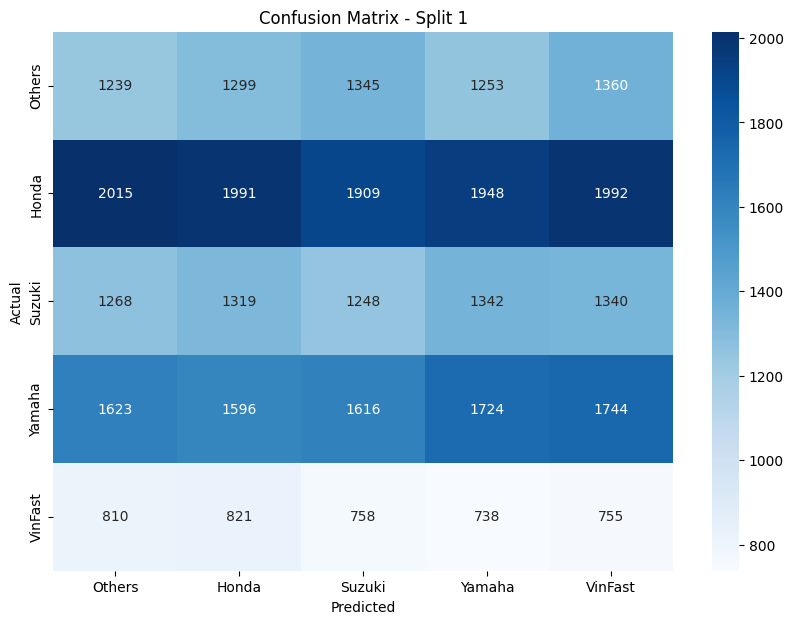

In [ ]:
# Ánh xạ CategoryID sang tên hãng xe
category_map = {0: 'Others', 1: 'Honda', 2: 'Suzuki', 3: 'Yamaha', 4: 'VinFast'}
test_df['CategoryName'] = test_df['CategoryID'].map(category_map)
test_df['PredictedCategoryName'] = test_df['PredictedCategoryID'].map(category_map)

# Tính confusion matrix và accuracy
conf_matrix = confusion_matrix(test_df['CategoryName'], test_df['PredictedCategoryName'], labels=list(category_map.values()))
accuracy = accuracy_score(test_df['CategoryName'], test_df['PredictedCategoryName'])

# Hiển thị confusion matrix và accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

# Vẽ heatmap của confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(category_map.values()), yticklabels=list(category_map.values()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Split 1')
plt.show()
